<a href="https://colab.research.google.com/github/yurikomuta/fraud_detection_ML/blob/main/PaySim_Fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Análise de dataset do [PaySim](https://www.kaggle.com/datasets/gopalmahadevan/fraud-detection-example) diretamente do Kaggle.

#Content
step - unidade de tempo (1 hora)

type - CASH-IN, CASH-OUT, DÉBITO, PAGAMENTO e TRANSFERÊNCIA.

amount - valor da transação em moeda local.

nameOrig - originador da transação

oldbalanceOrg - saldo inicial (antes da transação)

newbalanceOrig - novo saldo (após transação)

nameDest - destinatário da transação

oldbalanceDest - saldo inicial antes da transação.

newbalanceDest - novo saldo após a transação.

isFraud - O agente fraudulento assume o controle das contas dos clientes e tenta esvaziá-las transferindo para outra conta e depois sacando.

isFlaggedFraud – Uma tentativa ilegal de transferir uma grande quantidade de dinheiro em uma única transação.

**Bibliotecas**

In [1]:
import pandas as pd


Instalação pandas profilling

In [2]:
df = pd.read_csv('/content/fraud_dataset_example.csv')
print(df)

        step      type      amount     nameOrig  oldbalanceOrg  \
0          1   PAYMENT     9839.64  C1231006815      170136.00   
1          1   PAYMENT     1864.28  C1666544295       21249.00   
2          1  TRANSFER      181.00  C1305486145         181.00   
3          1  CASH_OUT      181.00   C840083671         181.00   
4          1   PAYMENT    11668.14  C2048537720       41554.00   
...      ...       ...         ...          ...            ...   
101608    10   PAYMENT     7477.02   C513257306         785.00   
101609    10  CASH_OUT   282252.35   C210473293      220339.29   
101610    10   PAYMENT    17289.01   C807582280           0.00   
101611    10  TRANSFER  1347146.45  C1315779140        1605.00   
101612    10  CASH_OUT   469539.21   C515691325       31133.00   

        newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
0            160296.36  M1979787155            0.00            0.00        0   
1             19384.72  M2044282225            

In [3]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

*manipulando colunas de fraudes para ínicio*

In [4]:
df = df[['isFraud',
       'isFlaggedFraud','step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest']]
df.head()

,isFraud,isFlaggedFraud,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest
0,0,0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0
1,0,0,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0
2,1,0,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0
3,1,0,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0
4,0,0,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0


Dicionário

colunas={
  'isFraud' = 'Fraude',
  'isFlaggedFraud' = 'Alerta FR',
  'step' = 'Tempo',
  'type' = 'Tipo',
  'amount' = 'Valor',
  'nameOrig' = 'cliente1',
  'oldbalanceOrg' = 'saldo_inicial_c1',
  'newbalanceOrig' = 'novo_saldo_c1',
  'nameDest' = 'cliente2',
  'oldbalanceDest' = 'saldo_inicial_c2',
  'newbalanceDest' = 'novo_saldo_c2',
}

In [5]:
colunas={
  'isFraud' : 'Fraude',
  'isFlaggedFraud' : 'Alerta FR',
  'step' : 'Tempo',
  'type' :'Tipo',
  'amount' : 'Valor',
  'nameOrig' : 'cliente1',
  'oldbalanceOrg' : 'saldo_inicial_c1',
  'newbalanceOrig' : 'novo_saldo_c1',
  'nameDest' : 'cliente2',
  'oldbalanceDest' : 'saldo_inicial_c2',
  'newbalanceDest' : 'novo_saldo_c2',
}

In [6]:
df = df.rename(columns = colunas)
df.head()

,Fraude,Alerta FR,Tempo,Tipo,Valor,cliente1,saldo_inicial_c1,novo_saldo_c1,cliente2,saldo_inicial_c2,novo_saldo_c2
0,0,0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0
1,0,0,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0
2,1,0,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0
3,1,0,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0
4,0,0,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0


#Conhecendo mais o df


In [7]:
df.describe()

,Fraude,Alerta FR,Tempo,Valor,saldo_inicial_c1,novo_saldo_c1,saldo_inicial_c2,novo_saldo_c2
count,101613.000000,101613.0,101613.000000,1.016130e+05,1.016130e+05,1.016130e+05,1.016130e+05,1.016130e+05
mean,0.001142,0.0,8.523457,1.740901e+05,9.071753e+05,9.234992e+05,8.810428e+05,1.183998e+06
std,0.033768,0.0,1.820681,3.450199e+05,2.829575e+06,2.867319e+06,2.399949e+06,2.797761e+06
min,0.000000,0.0,1.000000,3.200000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000,0.0,8.000000,1.001659e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000,0.0,9.000000,5.338541e+04,2.019047e+04,0.000000e+00,2.105800e+04,5.178343e+04
75%,0.000000,0.0,10.000000,2.124984e+05,1.947150e+05,2.192178e+05,5.919217e+05,1.063122e+06
max,1.000000,0.0,10.000000,1.000000e+07,3.893942e+07,3.894623e+07,3.400874e+07,3.894623e+07


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Fraude,101613.0,1.141586e-03,3.376824e-02,0.00,0.00,0.00,0.00,1.00
Alerta FR,101613.0,0.000000e+00,0.000000e+00,0.00,0.00,0.00,0.00,0.00
Tempo,101613.0,8.523457e+00,1.820681e+00,1.00,8.00,9.00,10.00,10.00
Valor,101613.0,1.740901e+05,3.450199e+05,0.32,10016.59,53385.41,212498.40,10000000.00
saldo_inicial_c1,101613.0,9.071753e+05,2.829575e+06,0.00,0.00,20190.47,194715.00,38939424.03
novo_saldo_c1,101613.0,9.234992e+05,2.867319e+06,0.00,0.00,0.00,219217.76,38946233.02
saldo_inicial_c2,101613.0,8.810428e+05,2.399949e+06,0.00,0.00,21058.00,591921.70,34008736.98
novo_saldo_c2,101613.0,1.183998e+06,2.797761e+06,0.00,0.00,51783.43,1063121.64,38946233.02


In [9]:
df.shape

(101613, 11)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101613 entries, 0 to 101612
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Fraude            101613 non-null  int64  
 1   Alerta FR         101613 non-null  int64  
 2   Tempo             101613 non-null  int64  
 3   Tipo              101613 non-null  object 
 4   Valor             101613 non-null  float64
 5   cliente1          101613 non-null  object 
 6   saldo_inicial_c1  101613 non-null  float64
 7   novo_saldo_c1     101613 non-null  float64
 8   cliente2          101613 non-null  object 
 9   saldo_inicial_c2  101613 non-null  float64
 10  novo_saldo_c2     101613 non-null  float64
dtypes: float64(5), int64(3), object(3)
memory usage: 8.5+ MB


In [11]:
df.groupby('Fraude').Tempo.count()

Fraude
0    101497
1       116
Name: Tempo, dtype: int64

In [12]:
#checagem de valores nulos
df.isnull().values.any()

False

In [13]:
pip install --upgrade joblib


In [14]:
pip install ydata-profiling


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.6/357.6 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 381.9/381.9 kB 19.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 14.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 26.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 32.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 45.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 50.4 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=78cf34468b067ff0ce7a9a11b5ef37c29056891f2a0f69c6309cbe6d7af272d4
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.5.0
 

In [16]:
from ydata_profiling import ProfileReport
ProfileReport(df)


ImportError: ignored

In [17]:
pip install --upgrade visions==0.7.5


In [18]:
!pip install typing-extensions


In [19]:
#enconding var obj > binário
df = pd.get_dummies(data=df, columns=['Tipo'])

In [ ]:
df.head()

In [21]:
#removendo colunas Alerta FR, cliente1 e client2
df = df.drop (['Alerta FR', 'cliente1', 'cliente2'], axis = 1)
df.head()

,Fraude,Tempo,Valor,saldo_inicial_c1,novo_saldo_c1,saldo_inicial_c2,novo_saldo_c2,Tipo_CASH_IN,Tipo_CASH_OUT,Tipo_DEBIT,Tipo_PAYMENT,Tipo_TRANSFER
0,0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,1,0
1,0,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,1,0
2,1,1,181.00,181.0,0.00,0.0,0.0,0,0,0,0,1
3,1,1,181.00,181.0,0.00,21182.0,0.0,0,1,0,0,0
4,0,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,0,1,0


**Regressão Logistica**

In [22]:
x = df.drop('Fraude', axis= 1)
y = df['Fraude']

In [23]:
#dividindo o todos os volumes de test
from sklearn.model_selection import train_test_split

#seed = replicabilidade
SEED = 42

#25% de test e 75% train
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.25, random_state=SEED)


In [24]:
#Definindo a regressão logistica
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

#max_iter = quantidade maxima de interações
lr = LogisticRegression(max_iter=1000, random_state=SEED)
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

#validando a predição por meio das metricas
print("Acurácia", metrics.accuracy_score(y_test, y_pred))
print("Precisão", metrics.precision_score(y_test, y_pred))
print("Recall", metrics.recall_score(y_test, y_pred))
print("F1", metrics.f1_score(y_test, y_pred))

Acurácia 0.9989765391276965
Precisão 0.2
Recall 0.043478260869565216
F1 0.07142857142857142


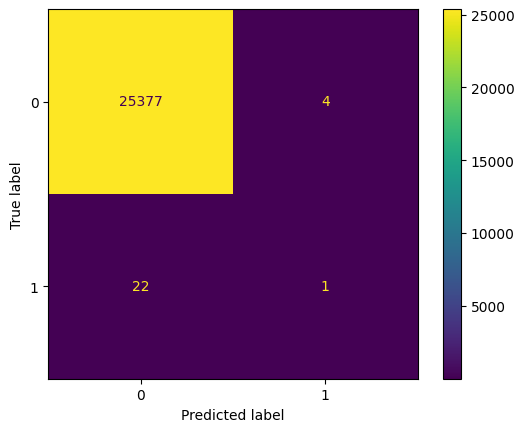

In [25]:
#matriz de confusão
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification
from sklearn.metrics import ConfusionMatrixDisplay
%matplotlib inline

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

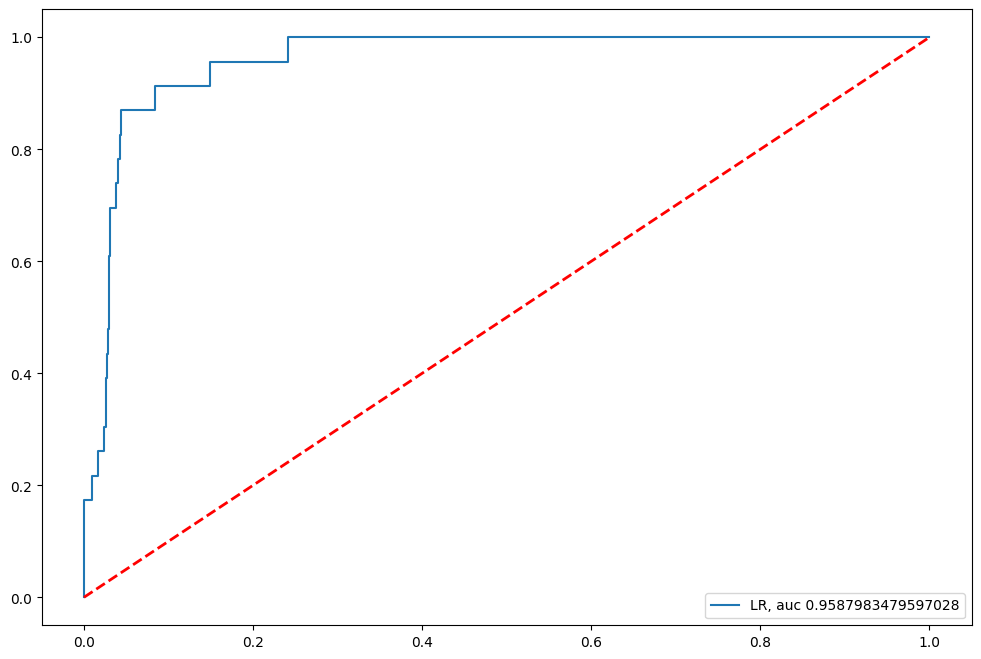

In [26]:
#curva ROC
y_pred_proba = lr.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.rcParams['figure.figsize'] = (12.,8.)
plt.plot(fpr, tpr, label="LR, auc "+str(auc))
plt.plot([0,1], [0,1], color='red', lw=2, linestyle='--')
plt.legend(loc=4)

#undersampling reduz os dados de NFR
#oversampling copia os dados da classe minoritária

SMOTE
knn
imbalanced-learn (biblioteca )

In [27]:
!pip install -U imbalanced-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 2.3 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1


In [28]:
from imblearn.over_sampling import SMOTE
import numpy as np

SEED= 42

smote = SMOTE (random_state=42)


In [29]:
x = df.drop('Fraude', axis=1)
y = df['Fraude']

x_resampled, y_resampled = smote.fit_resample(x,y)

In [30]:
 df_balanced = pd.concat([y_resampled, x_resampled], axis = 1)
 df_balanced

,Fraude,Tempo,Valor,saldo_inicial_c1,novo_saldo_c1,saldo_inicial_c2,novo_saldo_c2,Tipo_CASH_IN,Tipo_CASH_OUT,Tipo_DEBIT,Tipo_PAYMENT,Tipo_TRANSFER
0,0,1,9839.640000,170136.000000,160296.36,0.000000,0.000000,0,0,0,1,0
1,0,1,1864.280000,21249.000000,19384.72,0.000000,0.000000,0,0,0,1,0
2,1,1,181.000000,181.000000,0.00,0.000000,0.000000,0,0,0,0,1
3,1,1,181.000000,181.000000,0.00,21182.000000,0.000000,0,1,0,0,0
4,0,1,11668.140000,41554.000000,29885.86,0.000000,0.000000,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
202989,1,5,17608.962863,17608.962863,0.00,0.000000,0.000000,0,0,0,0,1
202990,1,7,12116.291013,12116.291013,0.00,0.000000,0.000000,0,0,0,0,1
202991,1,1,231612.880715,231612.880715,0.00,1945.589357,9370.603471,0,0,0,0,0
202992,1,9,547325.144758,547325.144758,0.00,0.000000,0.000000,0,0,0,0,1


In [31]:
df_balanced.groupby('Fraude').Tempo.count()

Fraude
0    101497
1    101497
Name: Tempo, dtype: int64

In [32]:
##Novo Teste da LR

x = df_balanced.iloc[:, 1].values
y = df_balanced.iloc [:, 0].values

In [33]:
from sklearn.model_selection import train_test_split

SEED = 42

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=25, random_state = SEED)

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Supondo que x_train e x_test sejam arrays unidimensionais (vetores)
x_train_reshaped = x_train.reshape(-1, 1)
x_test_reshaped = x_test.reshape(-1, 1)

# Definindo a regressão logística
lr = LogisticRegression(max_iter=1000, random_state=SEED)
lr.fit(x_train_reshaped, y_train)
y_pred = lr.predict(x_test_reshaped)

# Validando a predição por meio das métricas
print("Acurácia", metrics.accuracy_score(y_test, y_pred))
print("Precisão", metrics.precision_score(y_test, y_pred))
print("Recall", metrics.recall_score(y_test, y_pred))
print("F1", metrics.f1_score(y_test, y_pred))


Acurácia 0.84
Precisão 0.9230769230769231
Recall 0.8
F1 0.8571428571428571


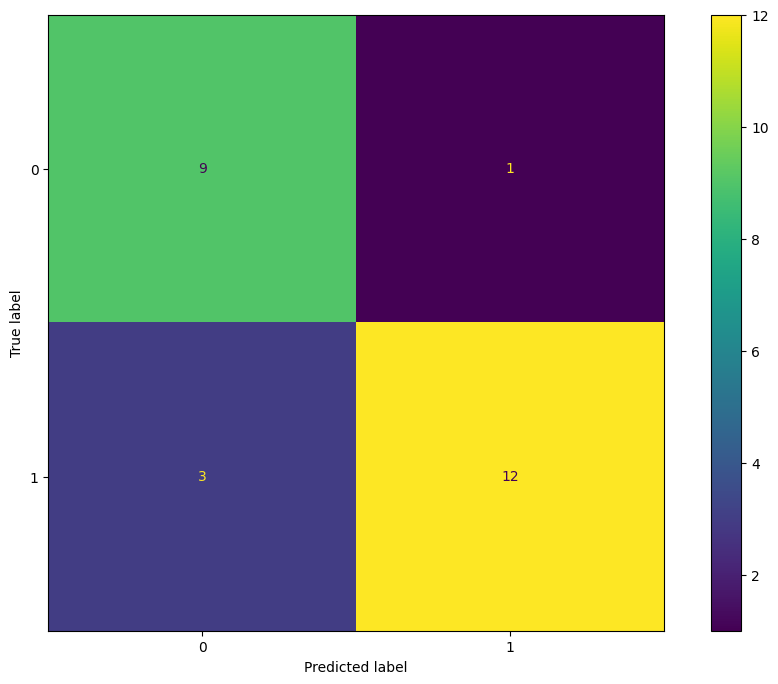

In [38]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

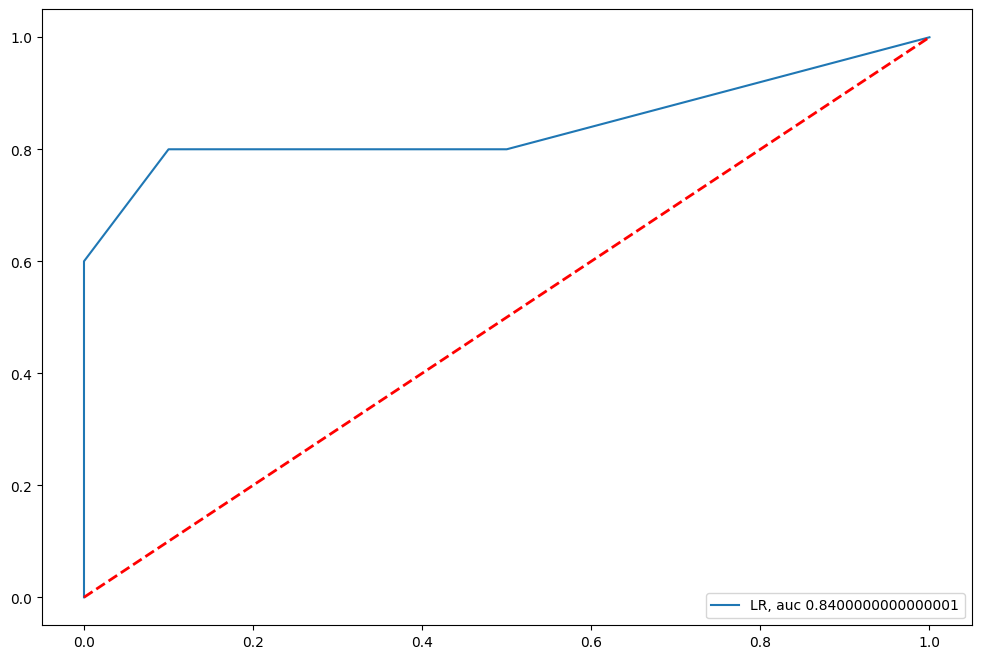

In [39]:
# Supondo que x_test seja um array unidimensional (vetor)
x_test_reshaped = x_test.reshape(-1, 1)

# Calcula a probabilidade da classe 1
y_pred_proba = lr.predict_proba(x_test_reshaped)[:, 1]

# Calcula a curva ROC
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

# Plota a curva ROC
plt.rcParams['figure.figsize'] = (12., 8.)
plt.plot(fpr, tpr, label="LR, auc "+str(auc))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.legend(loc=4)


In [40]:
pip install pydantic-settings


In [41]:
ProfileReport(df_balanced)

NameError: ignored

# **Arvoré de decisão**





In [42]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth= 5, random_state=SEED)


In [43]:
model = dt.fit(x_train.reshape(-1, 1), y_train)
y_pred = dt.predict(x_test.reshape(-1, 1))


# Validando a predição por meio das métricas
print("Acurácia", metrics.accuracy_score(y_test, y_pred))
print("Precisão", metrics.precision_score(y_test, y_pred))
print("Recall", metrics.recall_score(y_test, y_pred))
print("F1", metrics.f1_score(y_test, y_pred))


Acurácia 0.84
Precisão 0.9230769230769231
Recall 0.8
F1 0.8571428571428571


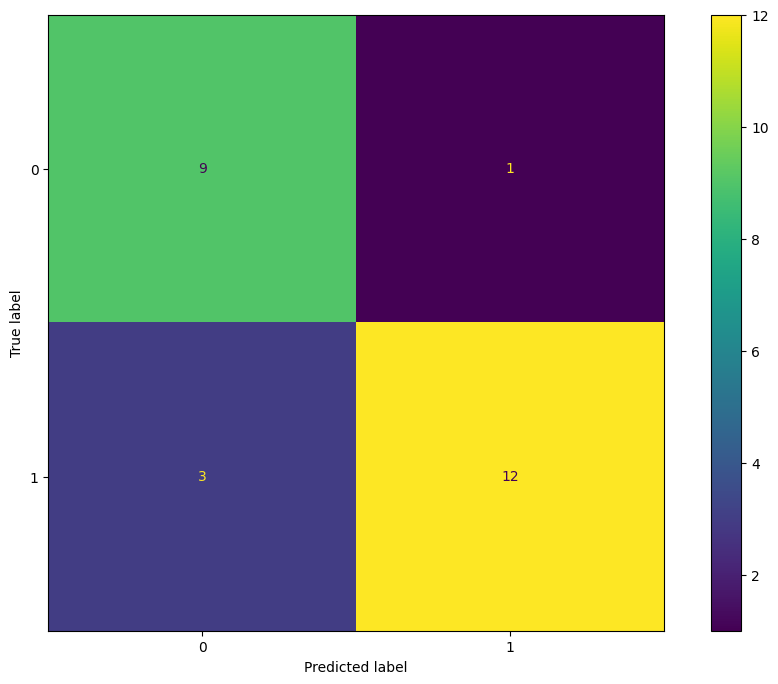

In [44]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

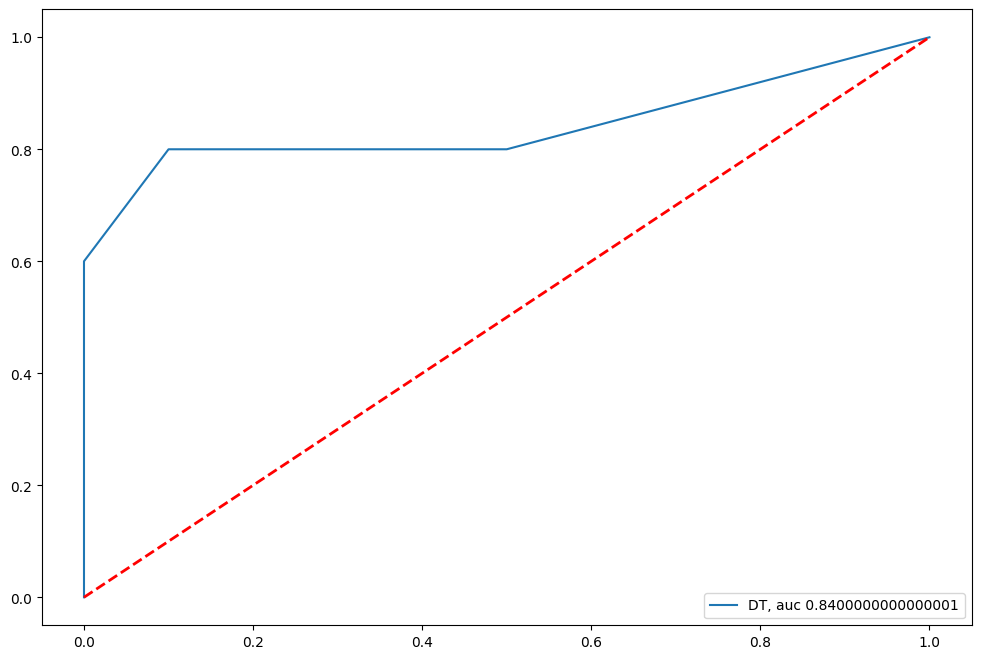

In [45]:
# Supondo que x_test seja um array unidimensional (vetor)
x_test_reshaped = x_test.reshape(-1, 1)

# Calcula a probabilidade da classe 1
y_pred_proba = dt.predict_proba(x_test_reshaped)[::, 1]

# Calcula a curva ROC
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

# Plota a curva ROC
plt.rcParams['figure.figsize'] = (12., 8.)
plt.plot(fpr, tpr, label="DT, auc "+str(auc))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.legend(loc=4)

# Random Forest

In [50]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
rf = RandomForestClassifier(max_depth=5, random_state= SEED, n_estimators=100)

In [53]:
model = rf.fit(x_train.reshape(-1, 1), y_train)
y_pred = rf.predict(x_test.reshape(-1, 1))


# Validando a predição por meio das métricas
print("Acurácia", metrics.accuracy_score(y_test, y_pred))
print("Precisão", metrics.precision_score(y_test, y_pred))
print("Recall", metrics.recall_score(y_test, y_pred))
print("F1", metrics.f1_score(y_test, y_pred))


Acurácia 0.84
Precisão 0.9230769230769231
Recall 0.8
F1 0.8571428571428571


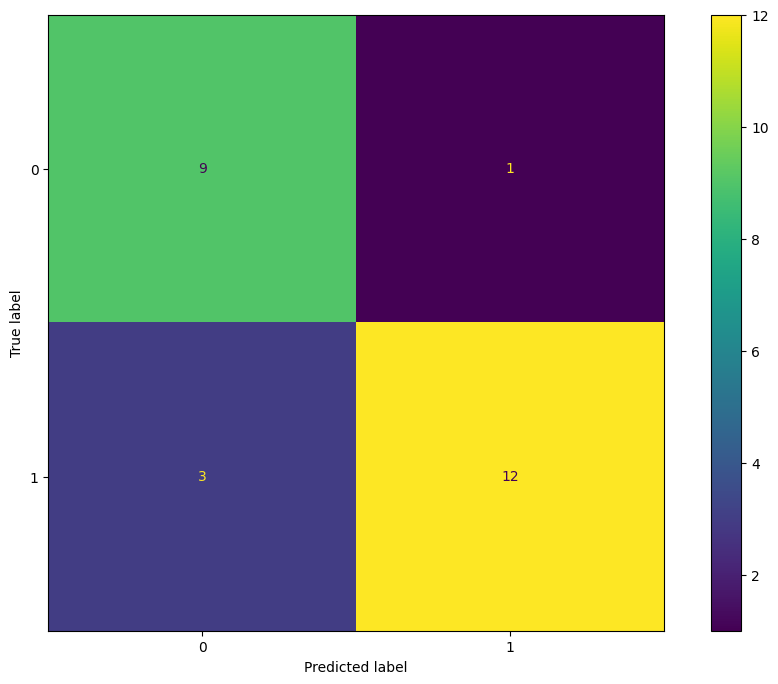

In [54]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

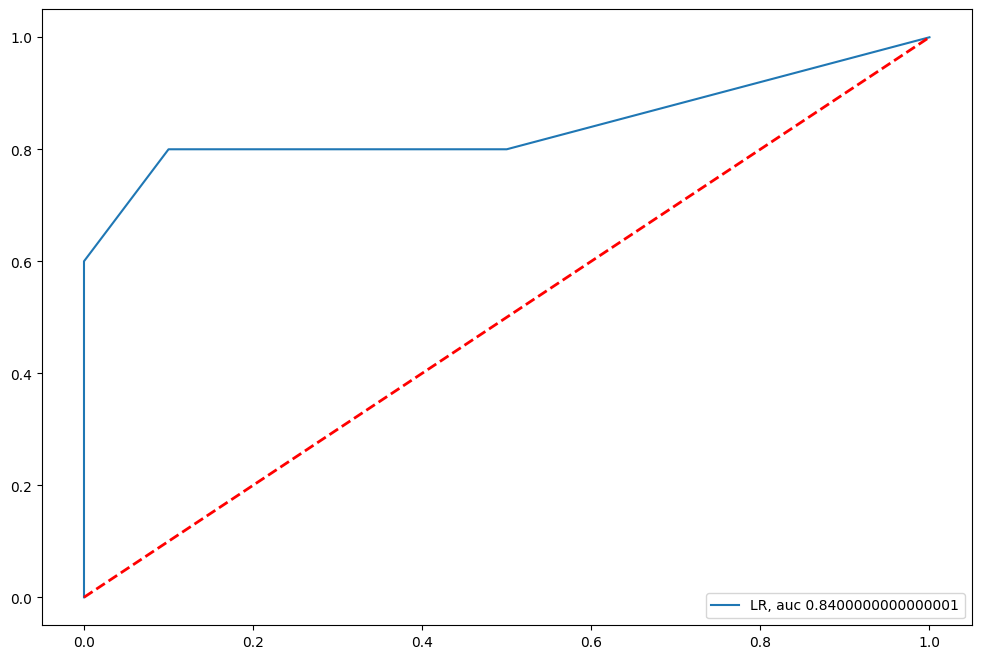

In [55]:
# Supondo que x_test seja um array unidimensional (vetor)
x_test_reshaped = x_test.reshape(-1, 1)

# Calcula a probabilidade da classe 1
y_pred_proba = rf.predict_proba(x_test_reshaped)[:, 1]

# Calcula a curva ROC
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

# Plota a curva ROC
plt.rcParams['figure.figsize'] = (12., 8.)
plt.plot(fpr, tpr, label="LR, auc "+str(auc))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.legend(loc=4)


# Análise de Métricas

In [56]:
classifiers = [
    LogisticRegression(max_iter=1000, random_state=SEED),
    DecisionTreeClassifier(max_depth=1000, random_state=SEED),
    RandomForestClassifier(max_depth=1000, random_state=SEED)
]

LogisticRegression
***Resultados***
Acurácia 0.84
Precisão 0.9230769230769231
Recall 0.8
F1 0.8571428571428571
DecisionTreeClassifier
***Resultados***
Acurácia 0.84
Precisão 0.9230769230769231
Recall 0.8
F1 0.8571428571428571
RandomForestClassifier
***Resultados***
Acurácia 0.84
Precisão 0.9230769230769231
Recall 0.8
F1 0.8571428571428571


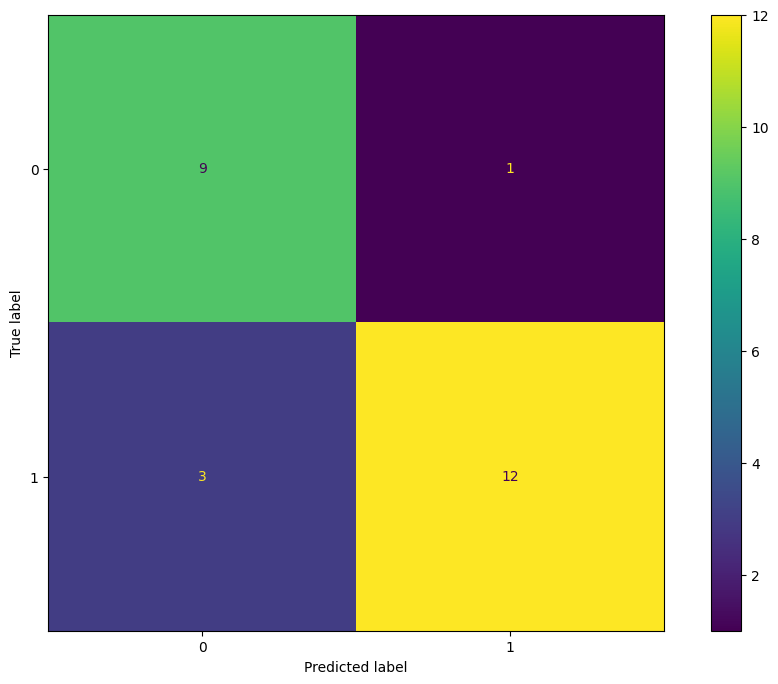

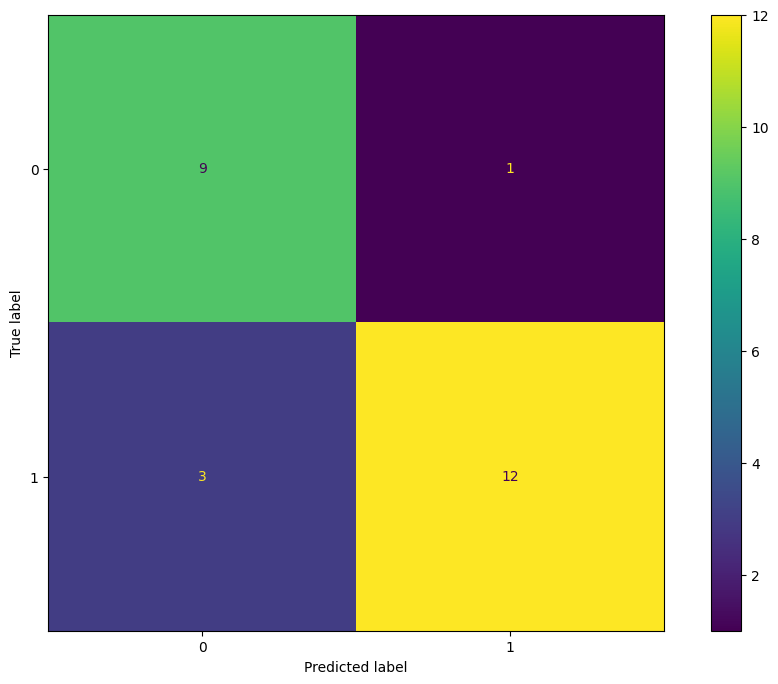

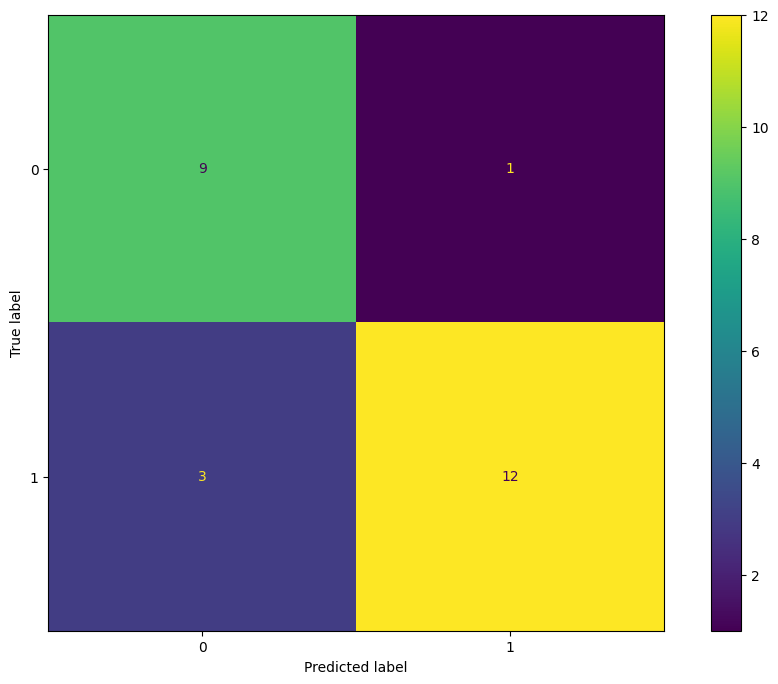

In [59]:
for clf in classifiers:
    clf.fit(x_train_reshaped, y_train)
    name = clf.__class__.__name__
    print("=" * 30)
    print(name)
    print("***Resultados***")

    # Ajuste a forma dos dados de teste
    x_test_reshaped = x_test.reshape(-1, 1)

    # Faça a previsão com os dados ajustados
    y_pred = clf.predict(x_test_reshaped)

    # Validando a predição por meio das métricas
    print("Acurácia", metrics.accuracy_score(y_test, y_pred))
    print("Precisão", metrics.precision_score(y_test, y_pred))
    print("Recall", metrics.recall_score(y_test, y_pred))
    print("F1", metrics.f1_score(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()

# Melhorando o modelo
[RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

In [60]:
n_estimators = np.arange(20,200, step=20)
criterion = ["gini", "entropy"]
max_features = ["auto", "sqrt","log2"]
max_depth = list(np.arange(2,10,step=1))
min_samples_split= np.arange(2,10,step=2)
min_samples_leaf = [1,2,4]
bootstrap = [True, False]

In [68]:
param_grid = {
    "n_estimators": n_estimators,
    "criterion": criterion,
    "max_features": max_features,
    "max_depth": max_depth,
    "min_samples_split": min_samples_split,
    "min_samples_leaf": min_samples_leaf,
    "bootstrap": bootstrap,
}


In [70]:
from sklearn.model_selection import RandomizedSearchCV

SEED=70

rforest= RandomForestClassifier(random_state=SEED)

In [84]:
# Supondo que X_train e y_train são seus dados de treinamento
x_train_reshaped = x_train.reshape(-1, 1)
y_train_reshaped = y_train.reshape(-1, 1)

# Agora, você pode criar e ajustar o RandomizedSearchCV
random_cv = RandomizedSearchCV(
    rforest, param_grid, n_iter=5, cv=3, scoring="recall", n_jobs=-1, random_state=SEED
)

# Utilize o método fit com os dados ajustados
random_cv.fit(x_train_reshaped, y_train_reshaped)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=70),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 8, 9],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': array([2, 4, 6, 8]),
                                        'n_estimators': array([ 20,  40,  60,  80, 100, 120, 140, 160, 180])},
                   random_state=70, scoring='recall')

In [85]:
%%time
rcv = random_cv.fit(x_train_reshaped, y_train_reshaped)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


CPU times: user 4.8 s, sys: 59 ms, total: 4.86 s
Wall time: 49.9 s


In [86]:
pd.DataFrame(rcv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_criterion,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,5.961153,0.406647,1.161759,0.284473,120,4,2,auto,9,gini,False,"{'n_estimators': 120, 'min_samples_split': 4, ...",0.797594,0.799539,0.798327,0.798486,0.000802,1
1,4.879698,0.626717,0.647809,0.009390,120,4,2,auto,2,gini,False,"{'n_estimators': 120, 'min_samples_split': 4, ...",0.797594,0.799539,0.798327,0.798486,0.000802,1
2,2.521355,0.432940,0.405346,0.138300,40,8,1,sqrt,7,entropy,False,"{'n_estimators': 40, 'min_samples_split': 8, '...",0.797594,0.799539,0.798327,0.798486,0.000802,1
3,5.585076,0.484496,0.641551,0.012615,100,8,4,log2,9,entropy,True,"{'n_estimators': 100, 'min_samples_split': 8, ...",0.797594,0.799539,0.798327,0.798486,0.000802,1
4,7.066795,0.819997,0.929360,0.319069,160,6,2,log2,2,gini,False,"{'n_estimators': 160, 'min_samples_split': 6, ...",0.797594,0.799539,0.798327,0.798486,0.000802,1


In [87]:
rcv.best_params_

{'n_estimators': 120,
 'min_samples_split': 4,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 9,
 'criterion': 'gini',
 'bootstrap': False}